# Children with Medical Complex Conditions

Motivation:
The motivation behind this project is to understand the framework in which children with complex chronic medical conditions and his families operate. Taking care of kids with several conditions is challenging for the families not only because it reqires coordinating different especialities but also coordinating with school and any other event. Those kids grow up with multiple medical visits, multiple things to track, multiple responsabilities in an age when his friends are just being kids. 

This project analizes first the clinical presentation of young adults to the emrgency room from the MIMIC-III dataset and then the data the clinical presentation of children to the emrgency room from the PIC dataset.

#### Datasets: MIMIC & PIC

There are limited public datasets that are open source and can be use. Here, we use the publicly available dataset Medical Information Mart for Intensive Care III, MIMIC-III and the Paediatric Intensive Care, PIC.

#### MIMIC
MIMIC-III is an open access hospital database that contains de-identified data from over 40,000 patients who were admitted to Beth Israel Deaconess Medical Center in Boston, Massachusetts, from 2001 to 2012.
To gain authorization to the access the data go to https://mimic.physionet.org/gettingstarted/access/ 
http://pic.nbscn.org/
MIMIC does not contain data from paediatric patients.
The data has been dowloaded, however due to xx

#### PIC
PIC (Pediatric Intensive Care) is a large pediatric-specific single-center bilingual database comprising information relating to children admitted to critical care units at a large children’s hospital in China. Data includes vital signs, medications, laboratory measurements, fluid balance, diagnostic codes, hospital length of stay, survival data, and more. 
To gain authorization to the access the data go to http://pic.nbscn.org/

-----------------------

"The databases are released under the Health Insurance Portability and Accountability Act (HIPAA) safe harbor provision."



## Part 1: Young Adults 



## 1.1. Data 

In this project, we will make use of the following MIMIC tables:

- PATIENTS - a table containing information about the patient (with contains all notes for each hospitalization (links with ADMISSIONS on SUBJECT_ID)
- ADMISSIONS - a table containing admission and discharge dates (has a unique identifier HADM_ID for each admission and links with PATIENTS on SUBJECT_ID)
- NOTEEVENTS - contains all notes for each hospitalization (links with ADMISSIONS on HADM_ID and with PATIENTS on SUBJECT_ID)
- ICUSTAYS - a table containing ICU stays (links with ADMISSIONS on HADM_ID and with PATIENTS on SUBJECT_ID)




In [69]:
# load the compressed files 
# 
import gzip

for filename in [ "data/PATIENTS.csv.gz","data/ADMISSIONS.csv.gz", "data/NOTEEVENTS.csv.gz",'data/ICUSTAYS.csv.gz']:
    with gzip.open(filename, 'rt') as f:
        data = f.read()
        
    with open(filename[:-3], 'wt') as f:
        f.write(data)

In [1]:
# load admissions table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime 

# read patients table
patient_df = pd.read_csv('data/PATIENTS.csv')

patient_df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [2]:
# show dimensions
patient_df.shape

(46520, 8)

In [ ]:
patient_df.info()

In [3]:
# full list of columns containing the data categories 
categories = patient_df.columns.ravel()
print (categories)


['ROW_ID' 'SUBJECT_ID' 'GENDER' 'DOB' 'DOD' 'DOD_HOSP' 'DOD_SSN'
 'EXPIRE_FLAG']


In [4]:
# read admissions table
adm_df = pd.read_csv('data/ADMISSIONS.csv')

adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
# show dimensions
adm_df.shape

(58976, 19)

In [6]:
# full list of columns containing the data categories 
categories = adm_df.columns.ravel()
print (categories)

['ROW_ID' 'SUBJECT_ID' 'HADM_ID' 'ADMITTIME' 'DISCHTIME' 'DEATHTIME'
 'ADMISSION_TYPE' 'ADMISSION_LOCATION' 'DISCHARGE_LOCATION' 'INSURANCE'
 'LANGUAGE' 'RELIGION' 'MARITAL_STATUS' 'ETHNICITY' 'EDREGTIME'
 'EDOUTTIME' 'DIAGNOSIS' 'HOSPITAL_EXPIRE_FLAG' 'HAS_CHARTEVENTS_DATA']


In [ ]:
adm_df.info()

In [70]:
# read admissions table
icustays_df = pd.read_csv('data/ICUSTAYS.csv')

icustays_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [71]:
# show dimensions
icustays_df.shape

(61532, 12)

In [72]:
icustays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
ROW_ID            61532 non-null int64
SUBJECT_ID        61532 non-null int64
HADM_ID           61532 non-null int64
ICUSTAY_ID        61532 non-null int64
DBSOURCE          61532 non-null object
FIRST_CAREUNIT    61532 non-null object
LAST_CAREUNIT     61532 non-null object
FIRST_WARDID      61532 non-null int64
LAST_WARDID       61532 non-null int64
INTIME            61532 non-null object
OUTTIME           61522 non-null object
LOS               61522 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [73]:
# full list of columns containing the data categories 
categories = icustays_df.columns.ravel()
print (categories)

['ROW_ID' 'SUBJECT_ID' 'HADM_ID' 'ICUSTAY_ID' 'DBSOURCE' 'FIRST_CAREUNIT'
 'LAST_CAREUNIT' 'FIRST_WARDID' 'LAST_WARDID' 'INTIME' 'OUTTIME' 'LOS']


In [7]:
# convert to dates
patient_df.DOB = pd.to_datetime(patient_df.DOB, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD = pd.to_datetime(patient_df.DOD, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD_HOSP = pd.to_datetime(patient_df.DOD_HOSP, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
patient_df.DOD_SSN = pd.to_datetime(patient_df.DOD_SSN,format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [8]:
# convert to dates
adm_df.ADMITTIME = pd.to_datetime(adm_df.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DISCHTIME = pd.to_datetime(adm_df.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DEATHTIME = pd.to_datetime(adm_df.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [74]:
# convert to dates
icustays_df.INTIME = pd.to_datetime(icustays_df.INTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
icustays_df.OUTTIME = pd.to_datetime(icustays_df.OUTTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [10]:
# merge datasets
df_adm_pat = pd.merge(adm_df[['SUBJECT_ID','HADM_ID','ADMITTIME']],
                        patient_df[['SUBJECT_ID', 'DOB','EXPIRE_FLAG']], 
                        on = ['SUBJECT_ID'],
                        how = 'left')

assert len(adm_df) == len(df_adm_pat), 'Number of rows increased'


In [91]:
df_a_p_i = pd.merge(adm_df[['SUBJECT_ID','HADM_ID','ADMITTIME']],
                    pd.merge(patient_df[['SUBJECT_ID', 'DOB','EXPIRE_FLAG']],
                             icustays_df[['SUBJECT_ID', 'ICUSTAY_ID','INTIME',"OUTTIME"]],
                             on = ['SUBJECT_ID'], how = 'left'),
                    on = ['SUBJECT_ID'],
                    how = 'left')


In [92]:
df_a_p_i.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DOB,EXPIRE_FLAG,ICUSTAY_ID,INTIME,OUTTIME
0,22,165315,2196-04-09 12:26:00,2131-05-07,0,204798.0,2196-04-09 12:27:00,2196-04-10 15:54:00
1,23,152223,2153-09-03 07:15:00,2082-07-17,0,227807.0,2153-09-03 09:38:55,2153-09-04 15:59:11
2,23,152223,2153-09-03 07:15:00,2082-07-17,0,234044.0,2157-10-21 11:40:38,2157-10-22 16:08:48
3,23,124321,2157-10-18 19:34:00,2082-07-17,0,227807.0,2153-09-03 09:38:55,2153-09-04 15:59:11
4,23,124321,2157-10-18 19:34:00,2082-07-17,0,234044.0,2157-10-21 11:40:38,2157-10-22 16:08:48


In [93]:
# sort by subject_ID and admission date

df_a_p_i = df_adm_pat1.sort_values(['SUBJECT_ID','ADMITTIME','INTIME'])
df_a_p_i = df_adm_pat1.reset_index(drop = True)


In [94]:
# verify that it did what we wanted

df_a_p_i.loc[df_a_p_i.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','INTIME']]

,SUBJECT_ID,ADMITTIME,INTIME
1468,124,2160-06-24 21:25:00,2160-07-09 19:47:26
1469,124,2160-06-24 21:25:00,2161-12-17 11:35:34
1470,124,2160-06-24 21:25:00,2165-05-30 08:59:04
1471,124,2160-06-24 21:25:00,2166-01-09 13:05:18
1472,124,2161-12-17 03:39:00,2160-07-09 19:47:26
1473,124,2161-12-17 03:39:00,2161-12-17 11:35:34
1474,124,2161-12-17 03:39:00,2165-05-30 08:59:04
1475,124,2161-12-17 03:39:00,2166-01-09 13:05:18
1476,124,2165-05-21 21:02:00,2160-07-09 19:47:26
1477,124,2165-05-21 21:02:00,2161-12-17 11:35:34


In [86]:
df_adm_pat1['first_admitance']= df_adm_pat1.groupby(['SUBJECT_ID'])['ADMITTIME'].transform('min')



In [88]:
# verify that it did what we wanted

df_adm_pat1.loc[df_adm_pat1.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','INTIME','first_admitance']]

,SUBJECT_ID,ADMITTIME,INTIME,first_admitance
1468,124,2160-06-24 21:25:00,2160-07-09 19:47:26,2160-06-24 21:25:00
1469,124,2160-06-24 21:25:00,2161-12-17 11:35:34,2160-06-24 21:25:00
1470,124,2160-06-24 21:25:00,2165-05-30 08:59:04,2160-06-24 21:25:00
1471,124,2160-06-24 21:25:00,2166-01-09 13:05:18,2160-06-24 21:25:00
1472,124,2161-12-17 03:39:00,2160-07-09 19:47:26,2160-06-24 21:25:00
1473,124,2161-12-17 03:39:00,2161-12-17 11:35:34,2160-06-24 21:25:00
1474,124,2161-12-17 03:39:00,2165-05-30 08:59:04,2160-06-24 21:25:00
1475,124,2161-12-17 03:39:00,2166-01-09 13:05:18,2160-06-24 21:25:00
1476,124,2165-05-21 21:02:00,2160-07-09 19:47:26,2160-06-24 21:25:00
1477,124,2165-05-21 21:02:00,2161-12-17 11:35:34,2160-06-24 21:25:00


#### Calculate the age at the time of first admission

A note about dates from MIMIC website:

DOB has only been shifted for patients older than 89. 

All dates in the database have been shifted to protect patient confidentiality. Dates will be internally consistent for the same patient, but randomly distributed in the future.

To determine the mortality rate we must first select the proper age group. I am calling them yough adults, and are those whose age is between 16 - 26 and mostlikely be included in their parents health insurance - if they have.

These yough adults are between 16 to 26 years old at the date of their first admission. To perform this query, we use patient admission dates and dates of birth.

In [17]:
# calculate age 

df_adm_pat['first_admitance'] = pd.to_datetime(df_adm_pat.first_admitance, errors='coerce', format = '%Y-%m-%d')

df_adm_pat['DOB'] = pd.to_datetime(df_adm_pat.DOB, errors='coerce',format = '%Y-%m-%d')




In [18]:
df_adm_pat.head()


,SUBJECT_ID,HADM_ID,ADMITTIME,DOB,EXPIRE_FLAG,first_admitance
0,2,163353,2138-07-17 19:04:00,2138-07-17,0,2138-07-17 19:04:00
1,3,145834,2101-10-20 19:08:00,2025-04-11,1,2101-10-20 19:08:00
2,4,185777,2191-03-16 00:28:00,2143-05-12,0,2191-03-16 00:28:00
3,5,178980,2103-02-02 04:31:00,2103-02-02,0,2103-02-02 04:31:00
4,6,107064,2175-05-30 07:15:00,2109-06-21,0,2175-05-30 07:15:00


In [19]:
# calculate age at first admission

df_adm_pat['age_first_adm'] = (df_adm_pat['first_admitance'] - df_adm_pat['DOB']).dt.days // 365 


The age of patients older than 89 has been shifted to protect their identity. 
Those patients have been assigned an age of 90

In [30]:
# age reasigment 

df_adm_pat['age_first_adm'] = [90 if x < 0 else x for x in df_adm_pat['age_first_adm']]
        

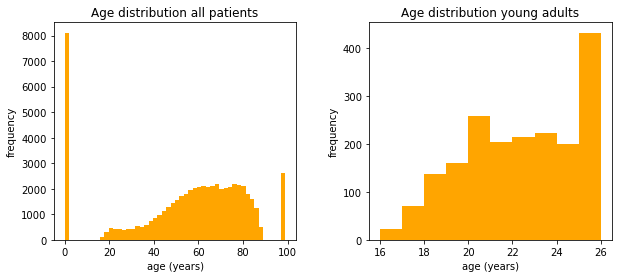

In [65]:
# age distribution

fig, axes = plt.subplots(1, 2, figsize=(10, 4))


df_adm_pat.hist('age_first_adm', bins = 50,ax=axes[0],color='orange', grid = False)
df_adm_pat[(df_adm_pat['age_first_adm']>= 16) & (df_adm_pat['age_first_adm'] <= 26)].hist('age_first_adm', bins=10,ax=axes[1],color='orange', grid = False)

axes[0].set(title='Age distribution all patients',xlabel='age (years)', ylabel='frequency' )
axes[1].set(title='Age distribution young adults',xlabel='age (years)', ylabel='frequency')

plt.show()

In [66]:
# choose patients between 16-26 years old at the time of their first admission


df_young = df_adm_pat[(df_adm_pat['age_first_adm']>= 16) & (df_adm_pat['age_first_adm'] <= 26)]


In [67]:
df_young.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 63 to 58959
Data columns (total 7 columns):
SUBJECT_ID         1921 non-null int64
HADM_ID            1921 non-null int64
ADMITTIME          1921 non-null datetime64[ns]
DOB                1921 non-null datetime64[ns]
EXPIRE_FLAG        1921 non-null int64
first_admitance    1921 non-null datetime64[ns]
age_first_adm      1921 non-null int64
dtypes: datetime64[ns](3), int64(4)
memory usage: 120.1 KB


Check how many ICU admissions each patient had 
